# Customer Purchase Behavior Analysis

## Executive Summary

This project analyzes customer purchasing behavior using a synthetic retail dataset of 1,000 transactions.  
The objective is to uncover patterns in customer demographics, spending behavior, and product performance to support data-driven business decisions.

Key findings include:
- The customer base spans a wide adult age range, with purchasing concentrated among mature customers.
- Order values are right-skewed, indicating that most purchases are low to mid-value with a small number of high-value transactions.
- Electronics is the highest revenue-generating category, while other categories contribute meaningfully to overall sales.
- Repeat customers place orders of similar value to one-time customers, suggesting that customer value is driven by purchase frequency rather than order size.

These insights can inform marketing strategy, product focus, and customer retention initiatives.

# Customer Purchase Behavior Analysis

**Objective:**  
Analyze customer purchasing behaviour to identify spending patterns, repeat customer trends, and potential business insights.

**Dataset:**  
Synthetic but realistic customer transaction data covering the past two years.

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# For dates
from datetime import datetime, timedelta

# Reproducibility
np.random.seed(42)

In [2]:
# Number of customers / transactions
N = 1000

In [5]:
# Customer IDs
customer_id = np.arange(1, N + 1)

# Age distribution (realistic adult customers)
age = np.random.randint(18, 70, size=N)

# Gender distribution
gender = np.random.choice(
    ['Male', 'Female', 'Other'],
    size=N,
    p=[0.48, 0.48, 0.04]
)

# Regions
region = np.random.choice(
    ['North', 'South', 'East', 'West'],
    size=N,
    p=[0.25, 0.25, 0.25, 0.25]
)

In [6]:
# Date range: last 2 years
start_date = datetime.now() - timedelta(days=730)

purchase_date = [
    start_date + timedelta(days=int(x))
    for x in np.random.randint(0, 730, size=N)
]

In [7]:
# Product categories
product_category = np.random.choice(
    ['Electronics', 'Clothing', 'Home', 'Beauty', 'Sports'],
    size=N,
    p=[0.25, 0.20, 0.20, 0.20, 0.15]
)

# Order values (right-skewed, realistic spending)
order_value = np.round(
    np.random.gamma(shape=2.0, scale=50.0, size=N),
    2
)

# Payment methods
payment_method = np.random.choice(
    ['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer'],
    size=N,
    p=[0.5, 0.25, 0.2, 0.05]
)

# Repeat customer flag
repeat_customer = np.random.choice(
    [0, 1],
    size=N,
    p=[0.6, 0.4]
)

In [8]:
df = pd.DataFrame({
    'customer_id': customer_id,
    'age': age,
    'gender': gender,
    'region': region,
    'purchase_date': purchase_date,
    'product_category': product_category,
    'order_value': order_value,
    'payment_method': payment_method,
    'repeat_customer': repeat_customer
})

df.head()

,customer_id,age,gender,region,purchase_date,product_category,order_value,payment_method,repeat_customer
0,1,66,Male,East,2025-10-20 12:28:20.220644,Electronics,59.52,Debit Card,0
1,2,39,Male,South,2024-02-22 12:28:20.220644,Electronics,55.95,Credit Card,0
2,3,67,Female,South,2024-11-03 12:28:20.220644,Clothing,42.12,Credit Card,0
3,4,67,Female,South,2024-01-15 12:28:20.220644,Sports,119.16,Credit Card,0
4,5,66,Female,South,2025-12-18 12:28:20.220644,Clothing,76.20,Credit Card,1


## 1. Data Overview & Quality Checks

Before analysis, we review the dataset structure, data types, and summary statistics to ensure data quality.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       1000 non-null   int64         
 1   age               1000 non-null   int64         
 2   gender            1000 non-null   object        
 3   region            1000 non-null   object        
 4   purchase_date     1000 non-null   datetime64[ns]
 5   product_category  1000 non-null   object        
 6   order_value       1000 non-null   float64       
 7   payment_method    1000 non-null   object        
 8   repeat_customer   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 70.4+ KB


In [10]:
df.describe()

,customer_id,age,purchase_date,order_value,repeat_customer
count,1000.000000,1000.000000,1000,1000.000000,1000.000000
mean,500.500000,43.173000,2025-01-22 19:10:05.820644352,98.531010,0.404000
min,1.000000,18.000000,2024-01-13 12:28:20.220644,1.740000,0.000000
25%,250.750000,30.000000,2024-07-27 12:28:20.220644096,47.465000,0.000000
50%,500.500000,43.000000,2025-01-28 00:28:20.220644096,81.290000,0.000000
75%,750.250000,56.000000,2025-07-24 12:28:20.220644096,132.457500,1.000000
max,1000.000000,69.000000,2026-01-11 12:28:20.220644,484.960000,1.000000
std,288.819436,15.187354,NaN,70.635872,0.490943


In [11]:
# Create datasets folder if it doesn't exist
import os
os.makedirs('../datasets', exist_ok=True)

# Save dataset
df.to_csv('../datasets/customer_purchase_data.csv', index=False)

### Data Quality Checks

We begin by checking for:
- Missing values
- Invalid ranges
- Data type consistency

This ensures the dataset is reliable before deeper analysis.

In [12]:
# Check for missing values
df.isna().sum()

customer_id         0
age                 0
gender              0
region              0
purchase_date       0
product_category    0
order_value         0
payment_method      0
repeat_customer     0
dtype: int64

In [13]:
# Validate numerical ranges
df[['age', 'order_value']].describe()

,age,order_value
count,1000.000000,1000.000000
mean,43.173000,98.531010
std,15.187354,70.635872
min,18.000000,1.740000
25%,30.000000,47.465000
50%,43.000000,81.290000
75%,56.000000,132.457500
max,69.000000,484.960000


In [14]:
# Ensure purchase_date is datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

### Initial Observations

- The dataset contains 1,000 customer transactions.
- No missing values were detected.
- Numerical values fall within expected business ranges.
- Date fields are properly formatted for time-based analysis.

The dataset is suitable for exploratory data analysis.

## 2. Exploratory Data Analysis (EDA)

This section explores customer demographics and purchasing behavior to uncover patterns and trends.

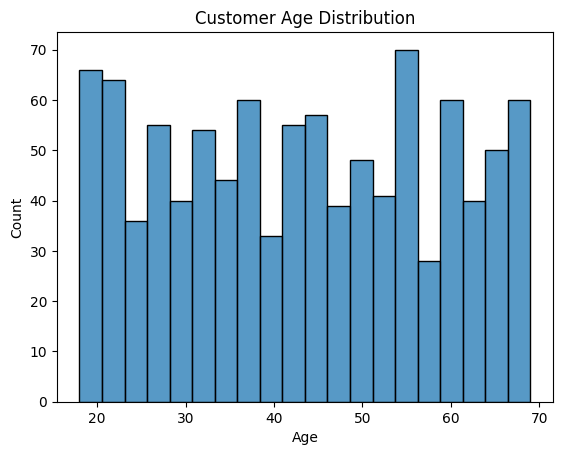

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(df['age'], bins=20)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Age Distribution Insights

- Customers span a wide range of adult age groups, indicating a broadly accessible product offering.
- The age distribution shows a clear concentration in the mid-to-late adult range.
- The most frequent customer age is **55 years** ($n = 70$), representing the largest single age cohort in the dataset.
- Overall, the customer base skews toward a mature demographic, which may influence product preferences and marketing strategies.

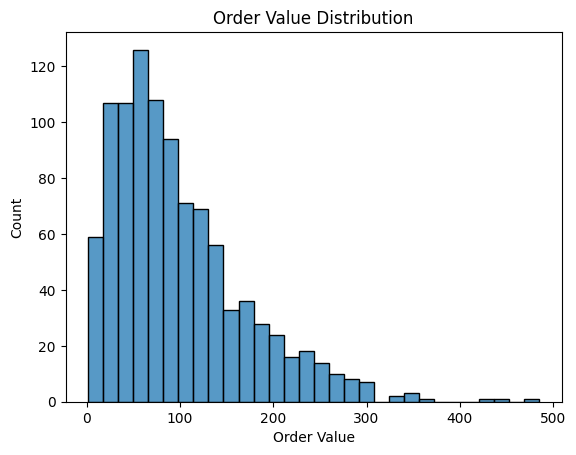

In [16]:
plt.figure()
sns.histplot(df['order_value'], bins=30)
plt.title('Order Value Distribution')
plt.xlabel('Order Value')
plt.ylabel('Count')
plt.show()

### Spending Behaviour Insights

- The order value distribution is **right-skewed**, with the highest frequency of transactions occurring at lower purchase amounts.
- Most customers place relatively low to moderate value orders, while a small number of transactions represent significantly higher spending.
- This long right tail suggests the presence of high-value customers who contribute disproportionately to revenue.
- Such a pattern is typical in retail and highlights opportunities for customer segmentation and targeted retention strategies.

## 3. Product Category & Customer Behaviour Analysis

This section examines purchasing patterns across product categories and compares behaviour between repeat and one-time customers.

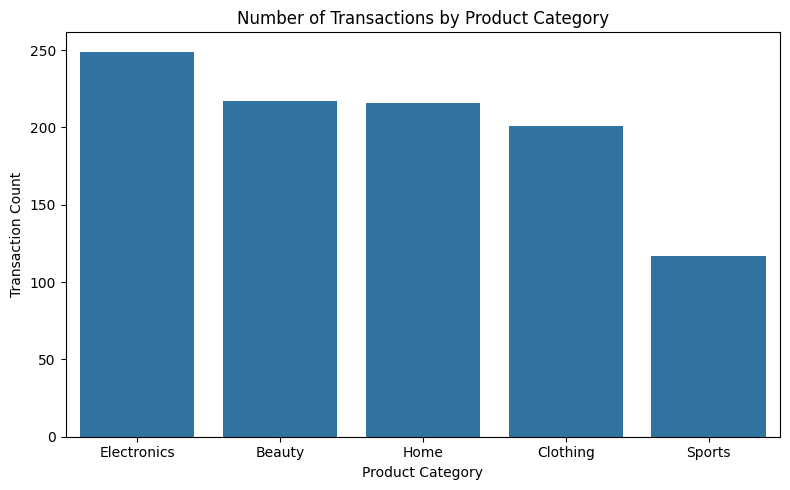

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='product_category',
    order=df['product_category'].value_counts().index
)
plt.title('Number of Transactions by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

- Electronics leads the portfolio with the highest transaction volume, exceeding 240 transactions.
- Beauty and Home categories show nearly identical performance, both surpassing the 200-transaction mark, followed by Clothing at approximately 200.
- Sports represents the lowest volume, suggesting either a niche market segment or an opportunity for aggressive promotional expansion.
- The relatively balanced distribution across the top four categories indicates a diversified revenue stream, reducing the business's reliance on any single product line.

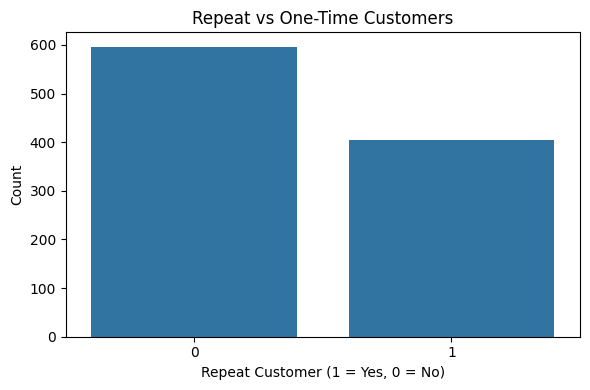

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x='repeat_customer'
)
plt.title('Repeat vs One-Time Customers')
plt.xlabel('Repeat Customer (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Repeat Customer Insights

- A larger proportion of customers are one-time purchasers, which totals approximately 600 transactions.
- The repeat customer segment accounts for roughly 400 transactions. This represents a 40% retention rate.
- Repeat customers represent a key opportunity for long-term revenue growth.
- Understanding differences in spending and category preferences between these groups can support targeted retention strategies.

In [20]:
df.groupby('repeat_customer')['order_value'].mean()

repeat_customer
0    98.570906
1    98.472153
Name: order_value, dtype: float64

### Spending Differences by Customer Type

- The average order value is very similar between one-time customers and repeat customers.
- One-time customers show a marginally higher average order value; however, the difference is negligible.
- This suggests that repeat purchasing behaviour in this dataset is driven more by purchase frequency rather than higher per-transaction spending.
- From a business perspective, increasing the number of purchases per customer may be more impactful than focusing solely on increasing individual order values.

## 4. Revenue Analysis

This section evaluates revenue contribution across product categories to identify high-impact areas for the business.

In [21]:
revenue_by_category = (
    df.groupby('product_category')['order_value']
      .sum()
      .sort_values(ascending=False)
)

revenue_by_category

product_category
Electronics    23386.71
Beauty         22323.84
Clothing       20496.46
Home           20223.16
Sports         12100.84
Name: order_value, dtype: float64

### Revenue Contribution by Category

- Revenue contribution varies noticeably across product categories.
- Electronics generates the highest total revenue, closely followed by Beauty, indicating that both categories are major revenue drivers.
- Clothing and Home contribute similar mid-range revenue levels, suggesting stable but less dominant performance.
- Sports contributes substantially less revenue than other categories, potentially representing a niche segment or an opportunity for targeted growth.
- These differences highlight the importance of prioritizing high-performing categories while evaluating strategies to improve lower-revenue segments.

## 5. Key Findings & Business Recommendations

### Key Findings
- The customer base spans a wide adult age range, with a noticeable concentration in mature age groups.
- Purchasing behavior exhibits a right-skewed distribution, where most transactions are lower-value purchases accompanied by a small number of high-value orders.
- Electronics and Beauty emerge as the leading contributors to total revenue, while Clothing and Home represent stable mid-tier categories.
- Repeat customers place orders of similar average value to one-time customers, indicating that customer value is driven primarily by purchase frequency rather than higher per-transaction spending.

### Business Recommendations
- Focus retention strategies on encouraging repeat purchases, as increasing purchase frequency is likely to have a greater impact on revenue than increasing order size alone.
- Prioritize marketing, inventory, and promotional efforts toward high-performing categories such as Electronics and Beauty.
- Develop targeted campaigns or product bundles to stimulate growth within mid-performing categories like Clothing and Home.
- Use customer segmentation insights to tailor offerings and messaging to mature customer demographics.